# Linear Regression

First let's import the neccessary libraries

In [15]:
import numpy as np #efficient numerical computations
import scipy #python library for scientific computing
import random
import pylab
import matplotlib.pyplot as plt #for plotting
import seaborn as sns #extra plot types, elegant styles
sns.set(style="white", color_codes=True)
import pandas as pd #data structures for data analysis

import warnings
warnings.filterwarnings("ignore")

 __Setting up the linear toy problem__

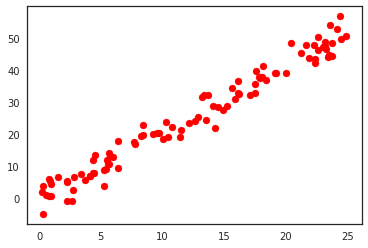

In [16]:
N=100
spanx=25
np.random.seed(88)
x = np.random.uniform(0,spanx,N)
y = 2*x + 1
noise = np.random.normal(0,3,N)
y = y + noise
plt.scatter(x,y, color="red")

plt.show()
y=np.reshape(y,(N,1))

Cost Function:
---------------
__Mean Squared Error (MSE)__

If $y^{(i)}$ is the actual data point, and $z^{(i)}$ be the predicted value by the model, 
\begin{equation*}
RMSE = \frac{1}{2N}\sum_{i=1}^{N}\big(z^{(i)} - y^{(i)}\big)^2
\end{equation*}

Gradient
---------
For hypothesis $h_{\theta}(x) = \theta_0 + \theta_1x \Rightarrow z^{(i)} =\theta_0 + \theta_1x^{(i)}$

\begin{equation*}
\frac{\partial h}{\partial \theta_0} = \frac{1}{N}\sum_{i=1}^{N}\big(z^{(i)} - y^{(i)}\big)
\end{equation*}

\begin{equation*}
\frac{\partial h}{\partial \theta_1} = \frac{1}{N}\sum_{i=1}^{N}\big(z^{(i)} - y^{(i)}\big).x^{(i)}
\end{equation*}


In [3]:
def sq_err(y,z):
    y_actual = np.array(y)
    y_pred = np.array(z)
    error = (y_actual - y_pred)**2
    error_mean = np.round(0.5*np.mean(error))
    return error_mean

Batch Gradient Descent
-----------------


__alpha__: The learning rate for gradient descent. It is a hyperparameter. Typical values of 0.1 to 0.001

__epochs__: the no. of steps taken

In [4]:
x = np.reshape(x, (N,1))
X = np.column_stack((np.ones(N),x)) #N x 2 matrix
X.shape

(100, 2)

In [5]:
theta = np.zeros(2)
theta = np.reshape(theta, (2,1)) #2 x 1 vector
h=X@theta
h.shape

(100, 1)

In [6]:
y.shape

(100, 1)

In [7]:
# df_x = pd.DataFrame(X)
# df_x.head(N)

In [8]:
alpha = 0.001
total_epoch = 10000

theta = np.zeros(2)
theta = np.reshape(theta, (2,1)) #2 x 1 vector
lossHistory = np.zeros([1,total_epoch]).T #total_epoch x 1 vector
t_e = np.zeros([2,total_epoch]).T

for epoch in range(total_epoch):
    h=X@theta
    lossHistory[epoch] = sq_err(y,h)
    del0=0
    del1=0    
    t_e[epoch][0] = theta[0]
    t_e[epoch][1] = theta[1]
    
    for i in range(N):
        del0 = del0 + h[i]-y[i]
        del1 = del1 + (h[i]-y[i])*x[i]
        
    del0 = del0/N
    del1 = del1/N
    grad = np.array([del0, del1])
    theta = theta - alpha*grad


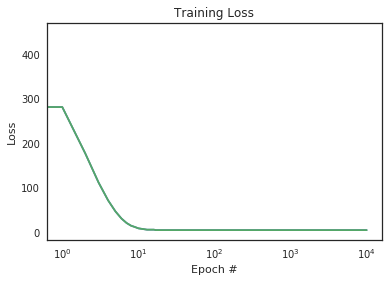

In [9]:
ep = np.linspace(0, total_epoch-1, total_epoch, endpoint=True)
plt.semilogx(ep, lossHistory, lossHistory)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

In [10]:
sq_err(y,h)

4.0

At epoch epoch_no, 5 theta_0= 0.082275,theta1= 1.423529.
At epoch epoch_no, 0 theta_0= 0.000000,theta1= 0.000000.
At epoch epoch_no, 1 theta_0= 0.072626,theta1= 1.255974.
At epoch epoch_no, 99 theta_0= 0.110728,theta1= 2.049687.
At epoch epoch_no, 999 theta_0= 0.045084,theta1= 2.053501.
At epoch epoch_no, 9999 theta_0= -0.158522,theta1= 2.065330.


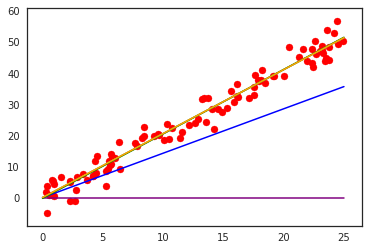

In [11]:
# t_e=np.around(t_e,3)
lx = np.linspace(0, spanx, 256, endpoint=True)

epoch_no=5
S = t_e[epoch_no][0]+t_e[epoch_no][1]*lx
plt.plot(lx, S, color="blue",  linewidth=1.5, linestyle="-")
print("At epoch epoch_no, %d theta_0= %f,theta1= %f." %(epoch_no, t_e[epoch_no][0], t_e[epoch_no][1]) )

S0 = t_e[0][0]+t_e[0][1]*lx
plt.plot(lx, S0, color="purple",  linewidth=1.5, linestyle="-")
print("At epoch epoch_no, %d theta_0= %f,theta1= %f." %(0, t_e[0][0], t_e[0][1]) )

print("At epoch epoch_no, %d theta_0= %f,theta1= %f." %(1, t_e[4][0], t_e[4][1]) )

S99 = t_e[99][0]+t_e[99][1]*lx
plt.plot(lx, S99, color="green",  linewidth=1.5, linestyle="-")
print("At epoch epoch_no, %d theta_0= %f,theta1= %f." %(99, t_e[99][0], t_e[99][1]) )

S999 = t_e[999][0]+t_e[999][1]*lx
plt.plot(lx, S999, color="pink",  linewidth=1.5, linestyle="-")
print("At epoch epoch_no, %d theta_0= %f,theta1= %f." %(999, t_e[999][0], t_e[999][1]) )

S_end = t_e[total_epoch-1][0]+t_e[total_epoch-1][1]*lx
plt.plot(lx, S_end, color="green",  linewidth=1.5, linestyle="-")
print("At epoch epoch_no, %d theta_0= %f,theta1= %f." %(total_epoch-1, t_e[total_epoch-1][0], t_e[total_epoch-1][1]) )

m = 1+ 2*lx
plt.plot(lx, S99, color="orange",  linewidth=1.5, linestyle="-")

plt.scatter(x,y, color="red")
plt.show()

Using Packages to perform Linear Regression
---------------------------------------
__sklearn__ is one such package that has inbuilt regressions

Modified from Source: http://scikit-learn.org/stable/auto_examples/plot_cv_predict.html#sphx-glr-auto-examples-plot-cv-predict-py

In [20]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd

lr = linear_model.LinearRegression()
array.reshape(-1)
lin_fit = cross_val_predict(lr, x, y, cv=10)

plt.scatter(x,y, color="red")
pl.scatter(x,lin_fit, color="blue")
plt.show()


ValueError: Expected 2D array, got 1D array instead:
array=[23.21846079  0.24714718  2.24805487 21.2550067  12.14052647 21.9208898
  7.68334847  9.69913865 14.53614357  2.84217951 19.19700462  7.814151
 16.15026149  0.81747292  4.15988942 10.75757581  5.69516175 24.15768665
 22.62348522 21.64157283  0.80406956 19.98744377 22.65388779 17.59833327
  5.74281117 10.28588998 24.46609904  8.226149   14.88822679 13.39615852
 11.52739889  5.64499155 23.01382415 15.27057105  5.50229804  0.98211499
 13.69723944  2.25466793 20.451707   17.08923953 23.39569976  2.24777657
  0.33394027  5.4028111   9.59268532 18.43834185  6.37635665  6.38496278
  5.97325545  2.66302522  4.55688983 22.32330833  1.49343502  4.14908797
  0.92531235 17.52133613 24.9162416   2.77567972 18.11392728  8.43533482
  4.42069127 23.54669693 24.39836224 19.11914645 10.06362541 10.45029425
 16.12443688  0.89209933  3.36703636 15.8693686  23.26377781 23.76056403
 14.08349291  5.30077801 13.52305127  4.33333094  3.68747714 18.16237585
  5.24420731  0.55225189 15.64921087 23.77331296 22.33998953  9.23159151
 23.21716182 12.87201785 23.59275513 14.23677733  0.33247337  8.45692106].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [7]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd

lr = linear_model.LinearRegression()
boston = datasets.load_boston()

print("Size of dataset is" , boston.data.shape)
df_b = pd.DataFrame(boston.data)
df_b.head(9) #shows the first 9 datapoints


Size of dataset is (506, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93


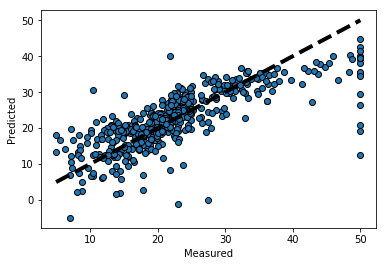

In [13]:
y = boston.target

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, boston.data, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()